# Desafio 4 Construindo um modelo de Regressão para marketing

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [4]:
# Bibliotecas a serem usadas
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Análise Descritiva

In [5]:
# Leitura da base de dados
base_dados = pd.read_csv('MKT.csv', sep = ',')
base_dados.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'MKT.csv'

In [ ]:
# Compreenção dos Valores
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
base_dados.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# Investimento em youtube com alto desvio padrão
# Remoção de outliers
base_dados_75pct = base_dados['youtube'].quantile(0.75)
print(base_dados_75pct)

262.98


In [ ]:
base_descritiva = base_dados.query("youtube <= "+str(base_dados_75pct)+"")
base_descritiva['investimento_total'] = base_descritiva['youtube']+base_descritiva['facebook']+base_descritiva['newspaper']
base_descritiva.tail(10)

,youtube,facebook,newspaper,sales,investimento_total
158,229.32,34.44,21.84,20.76,285.60
160,22.44,14.52,28.08,8.04,65.04
161,47.40,49.32,6.96,12.96,103.68
162,90.60,12.96,7.20,11.88,110.76
163,20.64,4.92,37.92,7.08,63.48
164,200.16,50.40,4.32,23.52,254.88
165,179.64,42.72,7.20,20.76,229.56
166,45.84,4.44,16.56,9.12,66.84
167,113.04,5.88,9.72,11.64,128.64
168,212.40,11.16,7.68,15.36,231.24


In [ ]:
base_descritiva.describe()

,youtube,facebook,newspaper,sales,investimento_total
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,135.175313,27.082500,33.669375,15.089063,195.927188
std,79.950752,17.734526,22.629200,5.353283,88.588731
min,0.840000,0.000000,1.080000,1.920000,25.680000
25%,66.630000,11.790000,14.730000,11.520000,115.800000
50%,132.300000,25.260000,30.720000,14.100000,196.320000
75%,207.780000,42.780000,46.440000,18.600000,269.070000
max,262.200000,59.520000,107.280000,28.560000,372.240000


In [ ]:
fig = px.box(base_descritiva, x="investimento_total")
fig.update_traces(line_color="#4c4185")

In [ ]:
fig = px.box(base_descritiva, x="sales")
fig.update_traces(line_color="#e83b4c")

## Análise Exploratória

In [ ]:
# Visão da base de dados atual
base_descritiva.tail(3)

,youtube,facebook,newspaper,sales,investimento_total
166,45.84,4.44,16.56,9.12,66.84
167,113.04,5.88,9.72,11.64,128.64
168,212.40,11.16,7.68,15.36,231.24


In [ ]:
# Copiando a base de dados
base_exploratoria =base_descritiva.copy()
base_exploratoria.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 168
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   youtube             128 non-null    float64
 1   facebook            128 non-null    float64
 2   newspaper           128 non-null    float64
 3   sales               128 non-null    float64
 4   investimento_total  128 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
# Verificação das colunas
base_exploratoria.columns

Index(['youtube', 'facebook', 'newspaper', 'sales', 'investimento_total'], dtype='object')

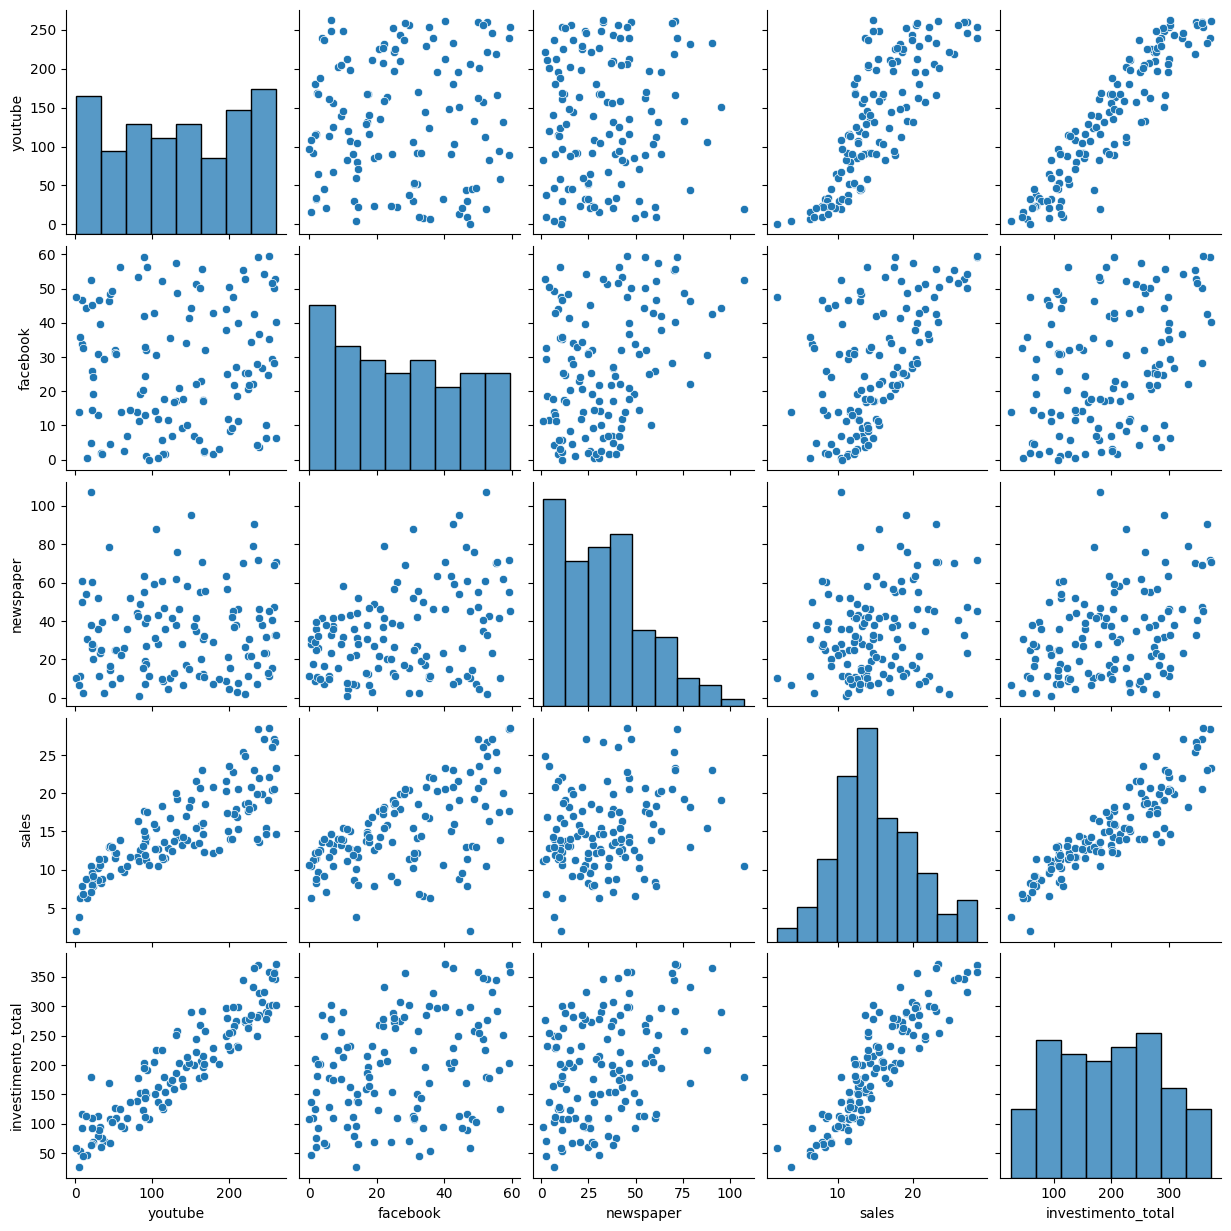

In [ ]:
# identificando relações entre as variáveis e descobrindo padrões relevantes
sns.pairplot(base_exploratoria)

# Verificar se há o crescimento linear entre as variais

In [ ]:
base_exploratoria.columns

Index(['youtube', 'facebook', 'newspaper', 'sales', 'investimento_total'], dtype='object')

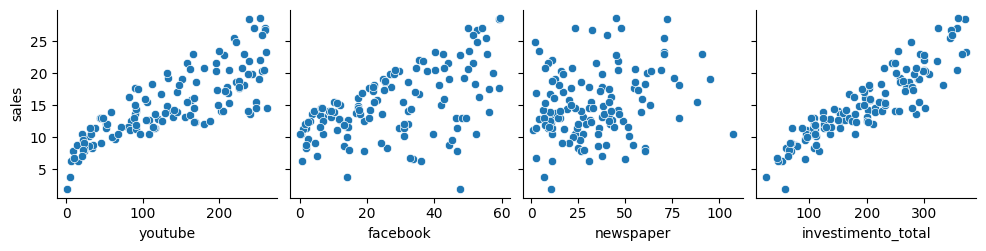

In [ ]:
sns.pairplot(base_exploratoria, x_vars=['youtube', 'facebook', 'newspaper','investimento_total'], y_vars="sales")

In [ ]:
# Correlação
base_exploratoria.corr()

,youtube,facebook,newspaper,sales,investimento_total
youtube,1.000000,0.063963,0.048838,0.809191,0.927773
facebook,0.063963,1.000000,0.337818,0.546080,0.344208
newspaper,0.048838,0.337818,1.000000,0.240821,0.367144
sales,0.809191,0.546080,0.240821,1.000000,0.901124
investimento_total,0.927773,0.344208,0.367144,0.901124,1.000000


<Axes: >

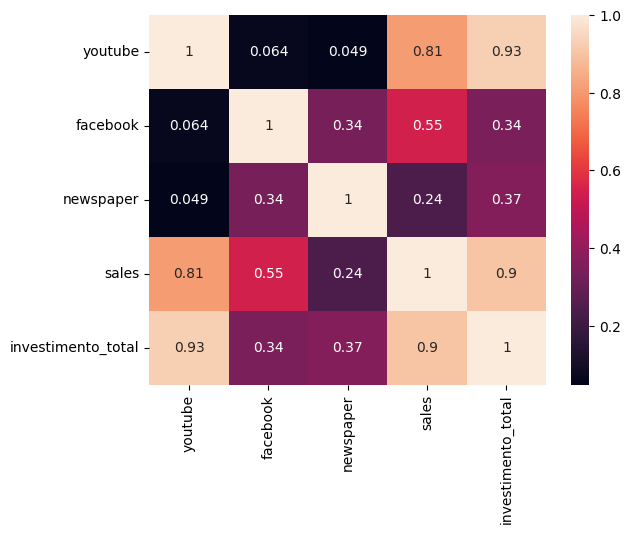

In [ ]:
# Mapa de calor da correlação entre as variaveis
sns.heatmap(base_exploratoria.corr(), annot=True)

<Axes: xlabel='sales', ylabel='Count'>

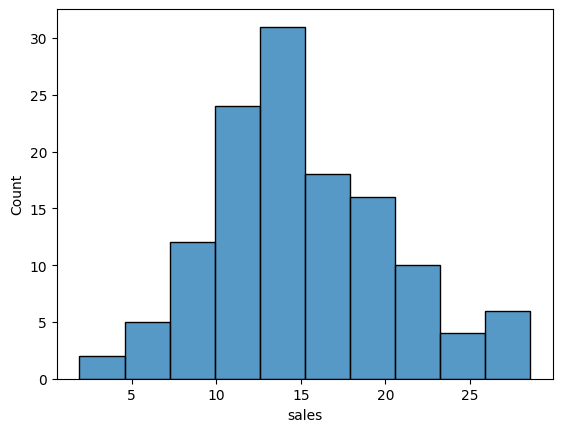

In [ ]:
# Verificação da distribuição
sns.histplot(base_exploratoria["sales"])

## Modelagem

In [ ]:
# Inicio da modelagem
base_modelagem = base_exploratoria.copy()
X = base_modelagem[['youtube', 'facebook', 'newspaper','investimento_total']]

Y = base_modelagem[["sales"]]

In [ ]:
# Segregação dos dados para aprendizagem
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(89, 4)
(39, 4)
(89, 1)
(39, 1)


In [ ]:
registro = X_test.shape
registro = registro[0]+1
print(registro)

40


In [ ]:
# Treinando o modelo
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Testando a previsão
y_pred = lm.predict(X_test)
r = r2_score(Y_test, y_pred)
print("r_quadrado:", r)

r_quadrado: 0.9239023774214363


Text(0, 0.5, 'Sales')

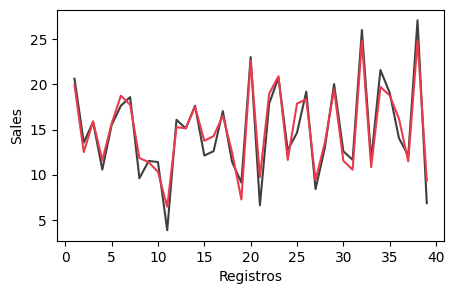

In [ ]:
c = [i for i in range(1, registro, 1)]
fig = plt.figure(figsize=(5,3))
plt.plot(c, Y_test, color="#3f3f3e")
plt.plot(c, y_pred, color = "#e83b4c")
plt.xlabel("Registros")
plt.ylabel("Sales")

# Usabilidade do modelo

In [ ]:
# Premissa do Usuário
projetato_youtube = float(input('Qual o investimento a ser realizado no canal Youtube?'))
projetato_facebook = float(input('Qual o investimento a ser realizado no canal Facebook?'))
projetato_newspaper = float(input('Qual o investimento a ser realizado no canal newspaper?'))
projetado_investimento_total = projetato_youtube+projetato_facebook+projetato_newspaper

Qual o investimento a ser realizado no canal Youtube?56
Qual o investimento a ser realizado no canal Facebook?32
Qual o investimento a ser realizado no canal newspaper?10


In [ ]:
print(projetato_youtube,projetato_facebook,projetato_newspaper,projetado_investimento_total)

56.0 32.0 10.0 98.0


In [ ]:
entrada = [[projetato_youtube,projetato_facebook,projetato_newspaper,projetado_investimento_total]]
lm.predict(entrada)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[11.64191905]])